In [1]:
import networkx as nx
class rotationSystem:

    def __init__(self, vertex, edge):
        """Takes in two lists of tuples of half edges"""
        self.vertex = vertex
        self.edge = edge
        
    def noVertices(self):
        return len(self.vertex)
    
    def noEdges(self):
        return len(self.edge)

    def conversion(self):
        """Converts a list of half edges and a list of half edge pairs into a list of edges to
            be used with networkx"""
        vertices = []
        edges = []
        vertexHalfEdge = {}

        for i in range(len(self.vertex)):  # creates a list of the vertices
            vertexHalfEdge[i] = self.vertex[i]
            vertices.append(i)

        for e in self.edge:
            x, y = e
            for key, value in vertexHalfEdge.items():
                try:
                    if x in value:
                        vertex1 = key
                    if y in value:
                        vertex2 = key
                except:
                    if x == value:
                        vertex1 = key
                    if y == value:
                        vertex2 = key
            edges.append(str(vertex1)+str(vertex2))

        return edges
    

        
    def findRotation(self, list1, x):
        """Find half edge rotation"""
        for l in list1:
            if x in l:
                for i in range(len(l)):
                    if l[i] == x:
                        halfEdge = l[(i+1) % len(l)]
        return halfEdge

    def findEdge(self, list1, x):
        """Find edge permutation"""
        for l in list1:
            if x in l:
                if l[0] == x:
                    return l[1]
                else:
                    return l[0]

    #find walk - for one edge
    def findWalk(self, permutation, edges, o):
        """Find border walk given half edge"""
        #set original half edge
        startEdge = o
        cycleList = [o]
        currentEdge = self.findRotation(permutation, o)
        cycleList.append(currentEdge)
        currentEdge = self.findEdge(edges,currentEdge)
        cycleList.append(currentEdge)
        while currentEdge != o:
            currentEdge = self.findRotation(permutation, currentEdge)
            cycleList.append(currentEdge)
            currentEdge = self.findEdge(edges,currentEdge)
            cycleList.append(currentEdge)
        return cycleList


    def findAllWalks(self):
        """Find all border walks"""
        checked = []
        cycles = []
        for i in range(len(self.edge)):
            for j in range(2):
                if self.edge[i][j] not in checked:
                    walk = self.findWalk(self.vertex, self.edge, self.edge[i][j])
                    
                    cycles.append(walk)
                    for x in range(0, len(walk),2):
                        checked.append(walk[x])
                    # print(checked)
        for l in cycles:
            for k in cycles:
                if k != l:
                    if set(k) == set(l):
                        cycles.remove(k)
                        
        return cycles

    def noCycles(self):
        """Returns a list with the number of each cycle"""
        cycles = []
        allCycles = []
        walks = self.findAllWalks()
        
        for i in walks:
            allCycles.append(int((len(i)-1)/2)) # walk is made up of 2 half edges for each vertex so need to divide by 2 and take away 1 as first half edge is counted twice
        
        for i in range(max(allCycles)+1):
            counter = 0
            for j in allCycles:
                if j == i:
                    counter +=1
            cycles.append(counter)
        
        return cycles
                
    #may change to replace 0,1,2,3,4,...-cycles to their actual names
    def displayCycles(self):
        """Displays the number of cycles """
        for i in range(len(self.noCycles())): #print out number of each cycle
            if self.noCycles()[i] != 0: #prevents printing out number of k-cycles if there is no k-cycle 
                print(f"Number of {i}-cycles is: {self.noCycles()[i]}")
    
    def noFaces(self):
        return len(self.findAllWalks())
    
    def displayFaces(self):
        print(f"Number of faces is: {self.noFaces()}")
        
    
    def findGenus(self):
        return (1 - 0.5*(self.noVertices() - self.noEdges() + self.noFaces()))
        
        


Number of 3-cycles is: 1
Number of 4-cycles is: 1
Number of 5-cycles is: 1
Number of faces is: 3


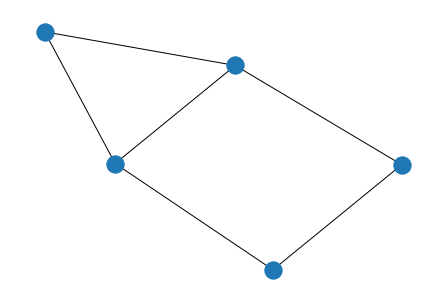

In [2]:
e = [(1,2),(3,4,5),(6,7),(8,9,10),(11,12)]
v = [(2,3),(5,6),(7,8),(9,4),(10,11),(12,1)]
r = rotationSystem(e,v)
r.displayCycles()
r.displayFaces()
G = nx.MultiGraph(r.conversion())
nx.draw(G)

In [3]:
r.findGenus()

0.0

Number of 3-cycles is: 3
Number of 4-cycles is: 1
Number of 7-cycles is: 1
Number of faces: 5


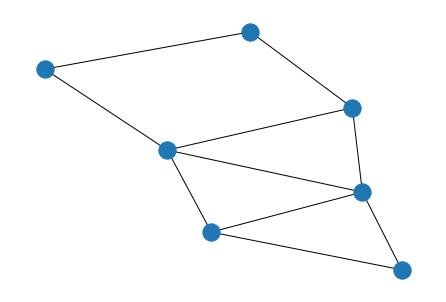

In [4]:
v1 = [(2,3),(4,5,12,14),(6,20,7),(8,15,9,11),(10,1,13), (18,19),(16,17)]
e1 = [(1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14),(15,16),(17,18),(19,20)]
r1 = rotationSystem(v1,e1)
r1.displayCycles()
print(f"Number of faces: {r1.noFaces()}")
G1 = nx.MultiGraph(r1.conversion())
nx.draw(G1)

In [5]:
r1.findGenus()

0.0

Number of 3-cycles is: 3
Number of 4-cycles is: 2
Number of 5-cycles is: 1
Number of faces: 6


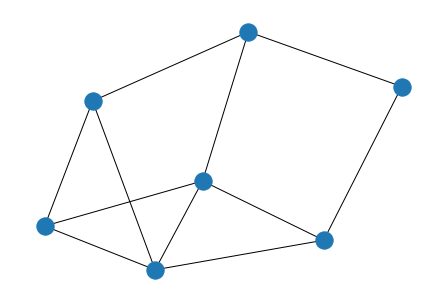

In [16]:
v2 = [(2,22,3),(4,5,12,14),(6,20,7),(8,15,9,11),(10,1,13), (18,19),(16,17,21)]
e2 = [(1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14),(15,16),(17,18),(19,20),(21,22)]
r2 = rotationSystem(v2,e2)
r2.displayCycles()
print(f"Number of faces: {r2.noFaces()}")
G2 = nx.MultiGraph(r2.conversion())
nx.draw(G2)

In [15]:
r2.findGenus()

0.0

Number of 4-cycles is: 2
Number of 5-cycles is: 1
Number of 13-cycles is: 1
Number of faces: 4


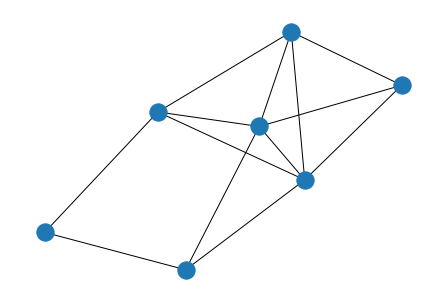

In [8]:
v3 = [(2,22,3,23,26),(4,5,12,14),(6,20,7,24),(8,15,9,25,11),(10,1,13), (18,19),(16,17,21)]
e3 = [(1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14),(15,16),(17,18),(19,20),(21,22),(23,24),(25,26)]
r3 = rotationSystem(v3,e3)
r3.displayCycles()
print(f"Number of faces: {r3.noFaces()}")
G3 = nx.MultiGraph(r3.conversion())
nx.draw(G3)

In [9]:
r3.findGenus()

2.0

Number of 3-cycles is: 8
Number of 6-cycles is: 2
Number of 8-cycles is: 1
Number of faces: 11


11

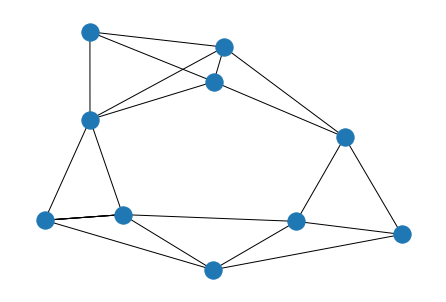

In [10]:
import matplotlib.pyplot as plt
v4 = [(1,2,3,4),(34,37,36,35),(30,31,32,33,44),(28,27,29),(26,25,43,42),(39,40,41,38),(23,24,21,22),(20,19,18,17),(15,16,14,13),(5,6,7,8,9),(10,11,12)]
e4 = [(1,37),(35,3),(2,44),(33,34),(4,5),(6,36),(13,12),(10,9),(8,18),(11,19),(16,17),(7,14),(20,21),(15,22),(24,25),(23,40),(39,43),(26,27),(42,31),(38,32),(29,30),(28,41)]
r4 = rotationSystem(v4,e4)
r4.displayCycles()
print(f"Number of faces: {r4.noFaces()}")
G4 = nx.MultiGraph(r4.conversion())
fig1 = nx.draw(G4)
fig1
plt.savefig("Rotation1.pdf")
r4.noVertices()

In [11]:
r4.noVertices()

11

In [12]:
e5 = [(1,2),(3,4),(5,6)]
v5 = [(1,4,6,5),(2,3)]
r5 = rotationSystem(v5,e5)
r5.noVertices()
r5.noEdges()
r5.findGenus()

0.0